# Import All Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
#from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf
from PIL import Image
import os
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Download Dataset from Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle_PlantGenius.json to kaggle_PlantGenius.json


{'kaggle_PlantGenius.json': b'{"username":"tanukii","key":"280670390ec86a16e6dc4906c207de8d"}'}

In [ ]:
# Path file kaggle_PG.json
kaggleJsonPath = '/content/kaggle_PlantGenius.json'

# Direktori untuk menyimpan file kaggle.json
kaggleDir = os.path.expanduser('~/.kaggle')

# Membuat direktori jika belum ada
os.makedirs(kaggleDir, exist_ok=True)

# Menyalin file kaggle_PG.json ke direktori ~/.kaggle dengan nama kaggle.json
shutil.copyfile(kaggleJsonPath, os.path.join(kaggleDir, 'kaggle.json'))

# Mengatur izin file kaggle.json
os.chmod(os.path.join(kaggleDir, 'kaggle.json'), 0o600)

In [ ]:
!kaggle datasets download -d tanukii/plantgeniusdataset

100% 1.47G/1.47G [01:18<00:00, 28.5MB/s]
100% 1.47G/1.47G [01:18<00:00, 20.0MB/s]


In [ ]:
!unzip -qq /content/plantgeniusdataset.zip

In [ ]:
#Define the directories
train_dir = '/content/Plant GeniuS Dataset/train'
valid_dir = "/content/Plant GeniuS Dataset/valid"
test_dir = "/content/Plant GeniuS Dataset/test"

train_Banana_cordana_dir = os.path.join(train_dir, "Banana_cordana")
train_Banana_healthy_dir = os.path.join(train_dir, "Banana_healthy")
train_Banana_pestalotiopsis_dir = os.path.join(train_dir, "Banana_pestalotiopsis")
train_Banana_sigatoka_dir = os.path.join(train_dir, "Banana_sigatoka")
train_Cacao_black_pod_rot_dir = os.path.join(train_dir, "Cacao___black_pod_rot")
train_Cacao_healthy_dir = os.path.join(train_dir, "Cacao___healthy")
train_Cacao_pod_borer_dir = os.path.join(train_dir, "Cacao___pod_borer")
train_Cassava_Brown_Leaf_Spot_dir = os.path.join(train_dir, "Cassava___Brown_Leaf_Spot")
train_Cassava_Brown_Streak_Disease_dir = os.path.join(train_dir, "Cassava___Brown_Streak_Disease")
train_Cassava_Green_Mottle_dir = os.path.join(train_dir, 'Cassava___Green_Mottle')
train_Cassava_healthy_dir = os.path.join(train_dir, 'Cassava___Healthy')
train_Cassava_Mosaic_Disease_dir = os.path.join(train_dir, 'Cassava___Mosaic_Disease')
train_Cassava_Resistance_Marker_dir = os.path.join(train_dir, 'Cassava___Resistance_Marker')
train_Coffee_Cerscospora_dir = os.path.join(train_dir,'Coffee___Cerscospora')
train_Coffee_healthy_dir = os.path.join(train_dir, 'Coffee___Healthy')
train_Coffee_Leaf_rust_dir = os.path.join(train_dir, 'Coffee___Leaf rust')
train_Coffee_Miner_dir = os.path.join(train_dir, 'Coffee___Miner')
train_Coffee_Phoma_dir = os.path.join(train_dir, "Coffee___Phoma")
train_Corn_Cercospora_leaf_spot_dir = os.path.join(train_dir, "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot")
train_Corn_Common_rust_dir = os.path.join(train_dir, "Corn_(maize)___Common_rust_")
train_Corn_Gray_Leaf_Spot_dir = os.path.join(train_dir, "Corn___Gray_Leaf_Spot")
train_Corn_healthy_dir = os.path.join(train_dir, "Corn_(maize)___healthy")
train_Corn_Northern_Leaf_Blight_dir = os.path.join(train_dir, "Corn_(maize)___Northern_Leaf_Blight")
train_Guava_Canker_dir = os.path.join(train_dir, "Guava___Canker")
train_Guava_Dot_dir = os.path.join(train_dir, "Guava___Dot")
train_Guava_Healthy_dir = os.path.join(train_dir, 'Guava___Healthy')
train_Guava_Mummification_dir = os.path.join(train_dir, 'Guava___Mummification')
train_Guava_Rust_dir = os.path.join(train_dir, 'Guava___Rust')
train_Mango_Anthracnose_dir = os.path.join(train_dir, 'Mango___Anthracnose')
train_Mango_Bacterial_Canker_dir = os.path.join(train_dir,'Mango___Bacterial_Canker')
train_Mango_Cutting_Weevil_dir = os.path.join(train_dir, 'Mango___Cutting_Weevil')
train_Mango_Die_Back_dir = os.path.join(train_dir, 'Mango___Die_Back')
train_Mango_Gall_Midge_dir = os.path.join(train_dir, 'Mango___Gall_Midge')
train_Mango_Healthy_dir = os.path.join(train_dir, "Mango___Healthy")
train_Mango_Powdery_Mildew_dir = os.path.join(train_dir, "Mango___Powdery_Mildew")
train_Mango_Sooty_Mould_dir = os.path.join(train_dir, "Mango___Sooty_Mould")
train_Orange_Haunglongbing_dir = os.path.join(train_dir, "Orange___Haunglongbing_(Citrus_greening)")
train_Potato_Early_blight_dir = os.path.join(train_dir, "Potato___Early_blight")
train_Potato_healthy_dir = os.path.join(train_dir, "Potato___healthy")
train_potato_hollow_heart_dir = os.path.join(train_dir, "potato___hollow_heart")
train_Potato_Late_blight_dir = os.path.join(train_dir, "Potato___Late_blight")
train_Rice_Bacterial_leaf_blight_dir = os.path.join(train_dir, 'Rice___Bacterial_leaf_blight')
train_Rice_BrownSpot_dir = os.path.join(train_dir, 'Rice___BrownSpot')
train_Rice_Healthy_dir = os.path.join(train_dir, 'Rice___Healthy')
train_Rice_Hispa_dir = os.path.join(train_dir, 'Rice___Hispa')
train_Rice_LeafBlast_dir = os.path.join(train_dir, 'Rice___LeafBlast')
train_Rice_sogatella_dir = os.path.join(train_dir, 'Rice Sogatella')
train_Rice_Tungro_dir = os.path.join(train_dir, 'Rice Tungro')
train_Soybean_healthy_dir = os.path.join(train_dir, 'Soybean___healthy')
train_Squash_Powdery_mildew_dir = os.path.join(train_dir, "Squash___Powdery_mildew")
train_Tea_algal_leaf_dir = os.path.join(train_dir, "Tea___algal_leaf")
train_Tea_Anthracnose_dir = os.path.join(train_dir, "Tea___Anthracnose")
train_Tea_brown_blight_dir = os.path.join(train_dir, "Tea___brown_blight")
train_Tea_gray_light_dir = os.path.join(train_dir, "Tea___gray_light")
train_Tea_healthy_dir = os.path.join(train_dir, "Tea___healthy")
train_Tea_helopeltis_dir = os.path.join(train_dir, "Tea___helopeltis")
train_Tea_red_leaf_spot_dir = os.path.join(train_dir, "Tea___red_leaf_spot")
train_Tea_white_spot_dir = os.path.join(train_dir, 'Tea___white_spot')
train_Tomato_Bacterial_spot_dir = os.path.join(train_dir, 'Tomato___Bacterial_spot')
train_Tomato_Early_blight_dir = os.path.join(train_dir, 'Tomato___Early_blight')
train_Tomato_healthy_dir = os.path.join(train_dir, 'Tomato___healthy')
train_Tomato_Late_blight_dir = os.path.join(train_dir,'Tomato___Late_blight')
train_Tomato_Leaf_Mold_dir = os.path.join(train_dir, 'Tomato___Leaf_Mold')
train_Tomato_Septoria_leaf_spot_dir = os.path.join(train_dir, 'Tomato___Septoria_leaf_spot')
train_Tomato_Spider_mitesTwospotted_spider_mite_dir = os.path.join(train_dir, 'Tomato___Spider_mites Two-spotted_spider_mite')
train_Tomato_Target_Spot_dir = os.path.join(train_dir, 'Tomato___Target_Spot')
train_Tomato_mosaic_virus_dir = os.path.join(train_dir, 'Tomato___Tomato_mosaic_virus')
train_Tomato_Yellow_Leaf_Curl_Virus_dir = os.path.join(train_dir, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')

val_Banana_cordana_dir = os.path.join(valid_dir, "Banana_cordana")
val_Banana_healthy_dir = os.path.join(valid_dir, "Banana_healthy")
val_Banana_pestalotiopsis_dir = os.path.join(valid_dir, "Banana_pestalotiopsis")
val_Banana_sigatoka_dir = os.path.join(valid_dir, "Banana_sigatoka")
val_Cacao_black_pod_rot_dir = os.path.join(valid_dir, "Cacao___black_pod_rot")
val_Cacao_healthy_dir = os.path.join(valid_dir, "Cacao___healthy")
val_Cacao_pod_borer_dir = os.path.join(valid_dir, "Cacao___pod_borer")
val_Cassava_Brown_Leaf_Spot_dir = os.path.join(valid_dir, "Cassava___Brown_Leaf_Spot")
val_Cassava_Brown_Streak_Disease_dir = os.path.join(valid_dir, "Cassava___Brown_Streak_Disease")
val_Cassava_Green_Mottle_dir = os.path.join(valid_dir, 'Cassava___Green_Mottle')
val_Cassava_healthy_dir = os.path.join(valid_dir, 'Cassava___Healthy')
val_Cassava_Mosaic_Disease_dir = os.path.join(valid_dir, 'Cassava___Mosaic_Disease')
val_Cassava_Resistance_Marker_dir = os.path.join(valid_dir, 'Cassava___Resistance_Marker')
val_Coffee_Cerscospora_dir = os.path.join(valid_dir,'Coffee___Cerscospora')
val_Coffee_healthy_dir = os.path.join(valid_dir, 'Coffee___Healthy')
val_Coffee_Leaf_rust_dir = os.path.join(valid_dir, 'Coffee___Leaf rust')
val_Coffee_Miner_dir = os.path.join(valid_dir, 'Coffee___Miner')
val_Coffee_Phoma_dir = os.path.join(valid_dir, "Coffee___Phoma")
val_Corn_Cercospora_leaf_spot_dir = os.path.join(test_dir, "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot")
val_Corn_Common_rust_dir = os.path.join(valid_dir, "Corn_(maize)___Common_rust_")
val_Corn_Gray_Leaf_Spot_dir = os.path.join(valid_dir, "Corn___Gray_Leaf_Spot")
val_Corn_healthy_dir = os.path.join(valid_dir, "Corn_(maize)___healthy")
val_Corn_Northern_Leaf_Blight_dir = os.path.join(valid_dir, "Corn_(maize)___Northern_Leaf_Blight")
val_Guava_Canker_dir = os.path.join(valid_dir, "Guava___Canker")
val_Guava_Dot_dir = os.path.join(valid_dir, "Guava___Dot")
val_Guava_Healthy_dir = os.path.join(valid_dir, 'Guava___Healthy')
val_Guava_Mummification_dir = os.path.join(valid_dir, 'Guava___Mummification')
val_Guava_Rust_dir = os.path.join(valid_dir, 'Guava___Rust')
val_Mango_Anthracnose_dir = os.path.join(valid_dir, 'Mango___Anthracnose')
val_Mango_Bacterial_Canker_dir = os.path.join(valid_dir,'Mango___Bacterial_Canker')
val_Mango_Cutting_Weevil_dir = os.path.join(valid_dir, 'Mango___Cutting_Weevil')
val_Mango_Die_Back_dir = os.path.join(valid_dir, 'Mango___Die_Back')
val_Mango_Gall_Midge_dir = os.path.join(valid_dir, 'Mango___Gall_Midge')
val_Mango_Healthy_dir = os.path.join(valid_dir, "Mango___Healthy")
val_Mango_Powdery_Mildew_dir = os.path.join(valid_dir, "Mango___Powdery_Mildew")
val_Mango_Sooty_Mould_dir = os.path.join(valid_dir, "Mango___Sooty_Mould")
val_Orange_Haunglongbing_dir = os.path.join(valid_dir, "Orange___Haunglongbing_(Citrus_greening)")
val_Potato_Early_blight_dir = os.path.join(valid_dir, "Potato___Early_blight")
val_Potato_healthy_dir = os.path.join(valid_dir, "Potato___healthy")
val_potato_hollow_heart_dir = os.path.join(valid_dir, "potato___hollow_heart")
val_Potato_Late_blight_dir = os.path.join(valid_dir, "Potato___Late_blight")
val_Rice_Bacterial_leaf_blight_dir = os.path.join(valid_dir, 'Rice___Bacterial_leaf_blight')
val_Rice_BrownSpot_dir = os.path.join(valid_dir, 'Rice___BrownSpot')
val_Rice_Healthy_dir = os.path.join(valid_dir, 'Rice___Healthy')
val_Rice_Hispa_dir = os.path.join(valid_dir, 'Rice___Hispa')
val_Rice_LeafBlast_dir = os.path.join(valid_dir, 'Rice___LeafBlast')
val_Rice_sogatella_dir = os.path.join(valid_dir, 'Rice Sogatella')
val_Rice_Tungro_dir = os.path.join(valid_dir, 'Rice Tungro')
val_Soybean_healthy_dir = os.path.join(valid_dir, 'Soybean___healthy')
val_Squash_Powdery_mildew_dir = os.path.join(valid_dir, "Squash___Powdery_mildew")
val_Tea_algal_leaf_dir = os.path.join(valid_dir, "Tea___algal_leaf")
val_Tea_Anthracnose_dir = os.path.join(valid_dir, "Tea___Anthracnose")
val_Tea_bird_eye_spot_dir = os.path.join(valid_dir, "Tea___bird_eye_spot")
val_Tea_brown_blight_dir = os.path.join(valid_dir, "Tea___brown_blight")
val_Tea_gray_light_dir = os.path.join(valid_dir, "Tea___gray_light")
val_Tea_healthy_dir = os.path.join(valid_dir, "Tea___healthy")
val_Tea_red_leaf_spot_dir = os.path.join(valid_dir, "Tea___red_leaf_spot")
val_Tea_white_spot_dir = os.path.join(valid_dir, 'Tea___white_spot')
val_Tomato_Bacterial_spot_dir = os.path.join(valid_dir, 'Tomato___Bacterial_spot')
val_Tomato_Early_blight_dir = os.path.join(valid_dir, 'Tomato___Early_blight')
val_Tomato_healthy_dir = os.path.join(valid_dir, 'Tomato___healthy')
val_Tomato_Late_blight_dir = os.path.join(valid_dir,'Tomato___Late_blight')
val_Tomato_Leaf_Mold_dir = os.path.join(valid_dir, 'Tomato___Leaf_Mold')
val_Tomato_Septoria_leaf_spot_dir = os.path.join(valid_dir, 'Tomato___Septoria_leaf_spot')
val_Tomato_Spider_mitesTwospotted_spider_mite_dir = os.path.join(valid_dir, 'Tomato___Spider_mites Two-spotted_spider_mite')
val_Tomato_Target_Spot_dir = os.path.join(valid_dir, 'Tomato___Target_Spot')
val_Tomato_mosaic_virus_dir = os.path.join(valid_dir, 'Tomato___Tomato_mosaic_virus')
val_Tomato_Yellow_Leaf_Curl_Virus_dir = os.path.join(valid_dir, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')

test_Banana_cordana_dir = os.path.join(test_dir, "Banana_cordana")
test_Banana_healthy_dir = os.path.join(test_dir, "Banana_healthy")
test_Banana_pestalotiopsis_dir = os.path.join(test_dir, "Banana_pestalotiopsis")
test_Banana_sigatoka_dir = os.path.join(test_dir, "Banana_sigatoka")
test_Cacao_black_pod_rot_dir = os.path.join(test_dir, "Cacao___black_pod_rot")
test_Cacao_healthy_dir = os.path.join(test_dir, "Cacao___healthy")
test_Cacao_pod_borer_dir = os.path.join(test_dir, "Cacao___pod_borer")
test_Cassava_Brown_Leaf_Spot_dir = os.path.join(test_dir, "Cassava___Brown_Leaf_Spot")
test_Cassava_Brown_Streak_Disease_dir = os.path.join(test_dir, "Cassava___Brown_Streak_Disease")
test_Cassava_Green_Mottle_dir = os.path.join(test_dir, 'Cassava___Green_Mottle')
test_Cassava_healthy_dir = os.path.join(test_dir, 'Cassava___Healthy')
test_Cassava_Mosaic_Disease_dir = os.path.join(test_dir, 'Cassava___Mosaic_Disease')
test_Cassava_Resistance_Marker_dir = os.path.join(test_dir, 'Cassava___Resistance_Marker')
test_Coffee_Cerscospora_dir = os.path.join(test_dir,'Coffee___Cerscospora')
test_Coffee_healthy_dir = os.path.join(test_dir, 'Coffee___Healthy')
test_Coffee_Leaf_rust_dir = os.path.join(test_dir, 'Coffee___Leaf rust')
test_Coffee_Miner_dir = os.path.join(test_dir, 'Coffee___Miner')
test_Coffee_Phoma_dir = os.path.join(test_dir, "Coffee___Phoma")
test_Corn_Cercospora_leaf_spot_dir = os.path.join(test_dir, "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot")
test_Corn_Common_rust_dir = os.path.join(test_dir, "Corn_(maize)___Common_rust_")
test_Corn_Gray_Leaf_Spot_dir = os.path.join(test_dir, "Corn___Gray_Leaf_Spot")
test_Corn_healthy_dir = os.path.join(test_dir, "Corn_(maize)___healthy")
test_Corn_Northern_Leaf_Blight_dir = os.path.join(test_dir, "Corn_(maize)___Northern_Leaf_Blight")
test_Guava_Canker_dir = os.path.join(test_dir, "Guava___Canker")
test_Guava_Dot_dir = os.path.join(test_dir, "Guava___Dot")
test_Guava_Healthy_dir = os.path.join(test_dir, 'Guava___Healthy')
test_Guava_Mummification_dir = os.path.join(test_dir, 'Guava___Mummification')
test_Guava_Rust_dir = os.path.join(test_dir, 'Guava___Rust')
test_Mango_Anthracnose_dir = os.path.join(test_dir, 'Mango___Anthracnose')
test_Mango_Bacterial_Canker_dir = os.path.join(test_dir,'Mango___Bacterial_Canker')
test_Mango_Cutting_Weevil_dir = os.path.join(test_dir, 'Mango___Cutting_Weevil')
test_Mango_Die_Back_dir = os.path.join(test_dir, 'Mango___Die_Back')
test_Mango_Gall_Midge_dir = os.path.join(test_dir, 'Mango___Gall_Midge')
test_Mango_Healthy_dir = os.path.join(test_dir, "Mango___Healthy")
test_Mango_Powdery_Mildew_dir = os.path.join(test_dir, "Mango___Powdery_Mildew")
test_Mango_Sooty_Mould_dir = os.path.join(test_dir, "Mango___Sooty_Mould")
test_Orange_Haunglongbing_dir = os.path.join(test_dir, "Orange___Haunglongbing_(Citrus_greening)")
test_Potato_Early_blight_dir = os.path.join(test_dir, "Potato___Early_blight")
test_Potato_healthy_dir = os.path.join(test_dir, "Potato___healthy")
test_potato_hollow_heart_dir = os.path.join(test_dir, "potato___hollow_heart")
test_Potato_Late_blight_dir = os.path.join(test_dir, "Potato___Late_blight")
test_Rice_Bacterial_leaf_blight_dir = os.path.join(test_dir, 'Rice___Bacterial_leaf_blight')
test_Rice_BrownSpot_dir = os.path.join(test_dir, 'Rice___BrownSpot')
test_Rice_Healthy_dir = os.path.join(test_dir, 'Rice___Healthy')
test_Rice_Hispa_dir = os.path.join(test_dir, 'Rice___Hispa')
test_Rice_LeafBlast_dir = os.path.join(test_dir, 'Rice___LeafBlast')
test_Rice_sogatella_dir = os.path.join(test_dir, 'Rice Sogatella')
test_Rice_Tungro_dir = os.path.join(test_dir, 'Rice Tungro')
test_Soybean_healthy_dir = os.path.join(test_dir, 'Soybean___healthy')
test_Squash_Powdery_mildew_dir = os.path.join(test_dir, "Squash___Powdery_mildew")
test_Tea_algal_leaf_dir = os.path.join(test_dir, "Tea___algal_leaf")
test_Tea_Anthracnose_dir = os.path.join(test_dir, "Tea___Anthracnose")
test_Tea_bird_eye_spot_dir = os.path.join(test_dir, "Tea___bird_eye_spot")
test_Tea_brown_blight_dir = os.path.join(test_dir, "Tea___brown_blight")
test_Tea_gray_light_dir = os.path.join(test_dir, "Tea___gray_light")
test_Tea_healthy_dir = os.path.join(test_dir, "Tea___healthy")
test_Tea_red_leaf_spot_dir = os.path.join(test_dir, "Tea___red_leaf_spot")
test_Tea_white_spot_dir = os.path.join(test_dir, 'Tea___white_spot')
test_Tomato_Bacterial_spot_dir = os.path.join(test_dir, 'Tomato___Bacterial_spot')
test_Tomato_Early_blight_dir = os.path.join(test_dir, 'Tomato___Early_blight')
test_Tomato_healthy_dir = os.path.join(test_dir, 'Tomato___healthy')
test_Tomato_Late_blight_dir = os.path.join(test_dir,'Tomato___Late_blight')
test_Tomato_Leaf_Mold_dir = os.path.join(test_dir, 'Tomato___Leaf_Mold')
test_Tomato_Septoria_leaf_spot_dir = os.path.join(test_dir, 'Tomato___Septoria_leaf_spot')
test_Tomato_Spider_mitesTwospotted_spider_mite_dir = os.path.join(test_dir, 'Tomato___Spider_mites Two-spotted_spider_mite')
test_Tomato_Target_Spot_dir = os.path.join(test_dir, 'Tomato___Target_Spot')
test_Tomato_mosaic_virus_dir = os.path.join(test_dir, 'Tomato___Tomato_mosaic_virus')
test_Tomato_Yellow_Leaf_Curl_Virus_dir = os.path.join(test_dir, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')

In [ ]:
#Counting the numbers of images in each directory
print("The Number of Images in Training Set")
print("Banana cordana:", len(os.listdir(train_Banana_cordana_dir)))
print("Banana healthy:", len(os.listdir(train_Banana_healthy_dir)))
print("Banana pestalotiopsis:", len(os.listdir(train_Banana_pestalotiopsis_dir)))
print("Banana sigatoka:", len(os.listdir(train_Banana_sigatoka_dir)))
print("Cacao black pod rot:", len(os.listdir(train_Cacao_black_pod_rot_dir)))
print("Cacao healthy:", len(os.listdir(train_Cacao_healthy_dir)))
print("Cacao pod borer:", len(os.listdir(train_Cacao_pod_borer_dir)))
print("Cassava Brown Leaf Spot:", len(os.listdir(train_Cassava_Brown_Leaf_Spot_dir)))
print("Cassava Brown Streak Disease:", len(os.listdir(train_Cassava_Brown_Streak_Disease_dir)))
print('Cassava Green Mottle :', len(os.listdir(train_Cassava_Green_Mottle_dir)))
print('Cassava healthy :', len(os.listdir(train_Cassava_healthy_dir)))
print('Cassava Mosaic Disease:', len(os.listdir(train_Cassava_Mosaic_Disease_dir)))
print('Cassava Resistance Marker:', len(os.listdir(train_Cassava_Resistance_Marker_dir)))
print('Coffee Cerscospora:', len(os.listdir(train_Coffee_Cerscospora_dir)))
print('Coffee healthy:', len(os.listdir(train_Coffee_healthy_dir)))
print('Coffee Leaf rust:', len(os.listdir(train_Coffee_Leaf_rust_dir)))
print('Coffee Miner:', len(os.listdir(train_Coffee_Miner_dir)))
print("Coffee Phoma:", len(os.listdir(train_Coffee_Phoma_dir)))
print("Corn Cercospora leaf spot:", len(os.listdir(train_Corn_Cercospora_leaf_spot_dir)))
print("Corn Common rust:", len(os.listdir(train_Corn_Common_rust_dir)))
print("Corn Gray leaf spot:", len(os.listdir(train_Corn_Gray_Leaf_Spot_dir)))
print("Corn healthy:", len(os.listdir(train_Corn_healthy_dir)))
print("Corn Northern leaf blight:", len(os.listdir(train_Corn_Northern_Leaf_Blight_dir)))
print("Guava Canker:", len(os.listdir(train_Guava_Canker_dir)))
print("Guava Dot:", len(os.listdir(train_Guava_Dot_dir)))
print('Guava Healthy:', len(os.listdir(train_Guava_Healthy_dir)))
print('Guava Mummification:', len(os.listdir(train_Guava_Mummification_dir)))
print('Guava Rust:', len(os.listdir(train_Guava_Rust_dir)))
print('Mango Anthracnose:', len(os.listdir(train_Mango_Anthracnose_dir)))
print('Mango Bacterial Canker:', len(os.listdir(train_Mango_Bacterial_Canker_dir)))
print('Mango Cutting Weevil:', len(os.listdir(train_Mango_Cutting_Weevil_dir)))
print('Mango Die back:', len(os.listdir(train_Mango_Die_Back_dir)))
print('Mango Gall midge:', len(os.listdir(train_Mango_Gall_Midge_dir)))
print("Mango Healthy:", len(os.listdir(train_Mango_Healthy_dir)))
print("Mango Powdery mildew:", len(os.listdir(train_Mango_Powdery_Mildew_dir)))
print("Mango Sooty mould:", len(os.listdir(train_Mango_Sooty_Mould_dir)))
print("Orange Haunglongbing:", len(os.listdir(train_Orange_Haunglongbing_dir)))
print("Potato Early blight:", len(os.listdir(train_Potato_Early_blight_dir)))
print("Potato healthy:", len(os.listdir(train_Potato_healthy_dir)))
print("Potato hollow heart:", len(os.listdir(train_potato_hollow_heart_dir)))
print("Potato Late blight:", len(os.listdir(train_Potato_Late_blight_dir)))
print('Rice Sogatella:', len(os.listdir(train_Rice_sogatella_dir)))
print('Rice Tungro:', len(os.listdir(train_Rice_Tungro_dir)))
print('Rice Bacterial leaf blight:', len(os.listdir(train_Rice_Bacterial_leaf_blight_dir)))
print('Rice BrownSpot:', len(os.listdir(train_Rice_BrownSpot_dir)))
print('Rice Healthy:', len(os.listdir(train_Rice_Healthy_dir)))
print('Rice Hispa:', len(os.listdir(train_Rice_Hispa_dir)))
print('Rice Leaf Blast:', len(os.listdir(train_Rice_LeafBlast_dir)))
print('Soybean healthy:', len(os.listdir(train_Soybean_healthy_dir)))
print("Squash Powdery mildew:", len(os.listdir(train_Squash_Powdery_mildew_dir)))
print("Tea algal leaf:", len(os.listdir(train_Tea_algal_leaf_dir)))
print("Tea Anthracnose:", len(os.listdir(train_Tea_Anthracnose_dir)))
print("Tea brown blight:", len(os.listdir(train_Tea_brown_blight_dir)))
print("Tea gray light:", len(os.listdir(train_Tea_gray_light_dir)))
print("Tea healthy:", len(os.listdir(train_Tea_healthy_dir)))
print("Tea red leaf spot:", len(os.listdir(train_Tea_red_leaf_spot_dir)))
print('Tea white spot:', len(os.listdir(train_Tea_white_spot_dir)))
print('Tomato Bacterial spot:', len(os.listdir(train_Tomato_Bacterial_spot_dir)))
print('Tomato Early blight:', len(os.listdir(train_Tomato_Early_blight_dir)))
print('Tomato healthy:', len(os.listdir(train_Tomato_healthy_dir)))
print('Tomato Late blight:', len(os.listdir(train_Tomato_Late_blight_dir)))
print('Tomato Leaf mold:', len(os.listdir(train_Tomato_Leaf_Mold_dir)))
print('Tomato Septoria leaf spot:', len(os.listdir(train_Tomato_Septoria_leaf_spot_dir)))
print('Tomato Spider mites:', len(os.listdir(train_Tomato_Spider_mitesTwospotted_spider_mite_dir)))
print('Tomato Target spot:', len(os.listdir(train_Tomato_Target_Spot_dir)))
print('Tomato Mosaic virus:', len(os.listdir(train_Tomato_mosaic_virus_dir)))
print('Tomato yellow leaf curl virus:', len(os.listdir(train_Tomato_Yellow_Leaf_Curl_Virus_dir)))


print("\nThe Number of Images in Validation Set")
print("Banana cordana:", len(os.listdir(val_Banana_cordana_dir)))
print("Banana healthy:", len(os.listdir(val_Banana_healthy_dir)))
print("Banana pestalotiopsis:", len(os.listdir(val_Banana_pestalotiopsis_dir)))
print("Banana sigatoka:", len(os.listdir(val_Banana_sigatoka_dir)))
print("Cacao black pod rot:", len(os.listdir(val_Cacao_black_pod_rot_dir)))
print("Cacao healthy:", len(os.listdir(val_Cacao_healthy_dir)))
print("Cacao pod borer:", len(os.listdir(val_Cacao_pod_borer_dir)))
print("Cassava Brown Leaf Spot:", len(os.listdir(val_Cassava_Brown_Leaf_Spot_dir)))
print("Cassava Brown Streak Disease:", len(os.listdir(val_Cassava_Brown_Streak_Disease_dir)))
print('Cassava Green Mottle :', len(os.listdir(val_Cassava_Green_Mottle_dir)))
print('Cassava healthy :', len(os.listdir(val_Cassava_healthy_dir)))
print('Cassava Mosaic Disease:', len(os.listdir(val_Cassava_Mosaic_Disease_dir)))
print('Cassava Resistance Marker:', len(os.listdir(val_Cassava_Resistance_Marker_dir)))
print('Coffee Cerscospora:', len(os.listdir(val_Coffee_Cerscospora_dir)))
print('Coffee healthy:', len(os.listdir(val_Coffee_healthy_dir)))
print('Coffee Leaf rust:', len(os.listdir(val_Coffee_Leaf_rust_dir)))
print('Coffee Miner:', len(os.listdir(val_Coffee_Miner_dir)))
print("Coffee Phoma:", len(os.listdir(val_Coffee_Phoma_dir)))
print("Corn Cercospora leaf spot:", len(os.listdir(val_Corn_Cercospora_leaf_spot_dir)))
print("Corn Common rust:", len(os.listdir(val_Corn_Common_rust_dir)))
print("Corn Gray leaf spot:", len(os.listdir(val_Corn_Gray_Leaf_Spot_dir)))
print("Corn healthy:", len(os.listdir(val_Corn_healthy_dir)))
print("Corn Northern leaf blight:", len(os.listdir(val_Corn_Northern_Leaf_Blight_dir)))
print("Guava Canker:", len(os.listdir(val_Guava_Canker_dir)))
print("Guava Dot:", len(os.listdir(val_Guava_Dot_dir)))
print('Guava Healthy:', len(os.listdir(val_Guava_Healthy_dir)))
print('Guava Mummification:', len(os.listdir(val_Guava_Mummification_dir)))
print('Guava Rust:', len(os.listdir(val_Guava_Rust_dir)))
print('Mango Anthracnose:', len(os.listdir(val_Mango_Anthracnose_dir)))
print('Mango Bacterial Canker:', len(os.listdir(val_Mango_Bacterial_Canker_dir)))
print('Mango Cutting Weevil:', len(os.listdir(val_Mango_Cutting_Weevil_dir)))
print('Mango Die back:', len(os.listdir(val_Mango_Die_Back_dir)))
print('Mango Gall midge:', len(os.listdir(val_Mango_Gall_Midge_dir)))
print("Mango Healthy:", len(os.listdir(val_Mango_Healthy_dir)))
print("Mango Powdery mildew:", len(os.listdir(val_Mango_Powdery_Mildew_dir)))
print("Mango Sooty mould:", len(os.listdir(val_Mango_Sooty_Mould_dir)))
print("Orange Haunglongbing:", len(os.listdir(val_Orange_Haunglongbing_dir)))
print("Potato Early blight:", len(os.listdir(val_Potato_Early_blight_dir)))
print("Potato healthy:", len(os.listdir(val_Potato_healthy_dir)))
print("Potato hollow heart:", len(os.listdir(val_potato_hollow_heart_dir)))
print("Potato Late blight:", len(os.listdir(val_Potato_Late_blight_dir)))
print('Rice Sogatella:', len(os.listdir(val_Rice_sogatella_dir)))
print('Rice Tungro:', len(os.listdir(val_Rice_Tungro_dir)))
print('Rice Bacterial leaf blight:', len(os.listdir(val_Rice_Bacterial_leaf_blight_dir)))
print('Rice BrownSpot:', len(os.listdir(val_Rice_BrownSpot_dir)))
print('Rice Healthy:', len(os.listdir(val_Rice_Healthy_dir)))
print('Rice Hispa:', len(os.listdir(val_Rice_Hispa_dir)))
print('Rice Leaf Blast:', len(os.listdir(val_Rice_LeafBlast_dir)))
print('Soybean healthy:', len(os.listdir(val_Soybean_healthy_dir)))
print("Squash Powdery mildew:", len(os.listdir(val_Squash_Powdery_mildew_dir)))
print("Tea algal leaf:", len(os.listdir(val_Tea_algal_leaf_dir)))
print("Tea Anthracnose:", len(os.listdir(val_Tea_Anthracnose_dir)))
print("Tea brown blight:", len(os.listdir(val_Tea_brown_blight_dir)))
print("Tea gray light:", len(os.listdir(val_Tea_gray_light_dir)))
print("Tea healthy:", len(os.listdir(val_Tea_healthy_dir)))
print("Tea red leaf spot:", len(os.listdir(val_Tea_red_leaf_spot_dir)))
print('Tea white spot:', len(os.listdir(val_Tea_white_spot_dir)))
print('Tomato Bacterial spot:', len(os.listdir(val_Tomato_Bacterial_spot_dir)))
print('Tomato Early blight:', len(os.listdir(val_Tomato_Early_blight_dir)))
print('Tomato healthy:', len(os.listdir(val_Tomato_healthy_dir)))
print('Tomato Late blight:', len(os.listdir(val_Tomato_Late_blight_dir)))
print('Tomato Leaf mold:', len(os.listdir(val_Tomato_Leaf_Mold_dir)))
print('Tomato Septoria leaf spot:', len(os.listdir(val_Tomato_Septoria_leaf_spot_dir)))
print('Tomato Spider mites:', len(os.listdir(val_Tomato_Spider_mitesTwospotted_spider_mite_dir)))
print('Tomato Target spot:', len(os.listdir(val_Tomato_Target_Spot_dir)))
print('Tomato Mosaic virus:', len(os.listdir(val_Tomato_mosaic_virus_dir)))
print('Tomato yellow leaf curl virus:', len(os.listdir(val_Tomato_Yellow_Leaf_Curl_Virus_dir)))


print("\nThe Number of Images in Test Set")
print("Banana cordana:", len(os.listdir(test_Banana_cordana_dir)))
print("Banana healthy:", len(os.listdir(test_Banana_healthy_dir)))
print("Banana pestalotiopsis:", len(os.listdir(test_Banana_pestalotiopsis_dir)))
print("Banana sigatoka:", len(os.listdir(test_Banana_sigatoka_dir)))
print("Cacao black pod rot:", len(os.listdir(test_Cacao_black_pod_rot_dir)))
print("Cacao healthy:", len(os.listdir(test_Cacao_healthy_dir)))
print("Cacao pod borer:", len(os.listdir(test_Cacao_pod_borer_dir)))
print("Cassava Brown Leaf Spot:", len(os.listdir(test_Cassava_Brown_Leaf_Spot_dir)))
print("Cassava Brown Streak Disease:", len(os.listdir(test_Cassava_Brown_Streak_Disease_dir)))
print('Cassava Green Mottle :', len(os.listdir(test_Cassava_Green_Mottle_dir)))
print('Cassava healthy :', len(os.listdir(test_Cassava_healthy_dir)))
print('Cassava Mosaic Disease:', len(os.listdir(test_Cassava_Mosaic_Disease_dir)))
print('Cassava Resistance Marker:', len(os.listdir(test_Cassava_Resistance_Marker_dir)))
print('Coffee Cerscospora:', len(os.listdir(test_Coffee_Cerscospora_dir)))
print('Coffee healthy:', len(os.listdir(test_Coffee_healthy_dir)))
print('Coffee Leaf rust:', len(os.listdir(test_Coffee_Leaf_rust_dir)))
print('Coffee Miner:', len(os.listdir(test_Coffee_Miner_dir)))
print("Coffee Phoma:", len(os.listdir(test_Coffee_Phoma_dir)))
print("Corn Cercospora leaf spot:", len(os.listdir(test_Corn_Cercospora_leaf_spot_dir)))
print("Corn Common rust:", len(os.listdir(test_Corn_Common_rust_dir)))
print("Corn Gray leaf spot:", len(os.listdir(test_Corn_Gray_Leaf_Spot_dir)))
print("Corn healthy:", len(os.listdir(test_Corn_healthy_dir)))
print("Corn Northern leaf blight:", len(os.listdir(test_Corn_Northern_Leaf_Blight_dir)))
print("Guava Canker:", len(os.listdir(test_Guava_Canker_dir)))
print("Guava Dot:", len(os.listdir(test_Guava_Dot_dir)))
print('Guava Healthy:', len(os.listdir(test_Guava_Healthy_dir)))
print('Guava Mummification:', len(os.listdir(test_Guava_Mummification_dir)))
print('Guava Rust:', len(os.listdir(test_Guava_Rust_dir)))
print('Mango Anthracnose:', len(os.listdir(test_Mango_Anthracnose_dir)))
print('Mango Bacterial Canker:', len(os.listdir(test_Mango_Bacterial_Canker_dir)))
print('Mango Cutting Weevil:', len(os.listdir(test_Mango_Cutting_Weevil_dir)))
print('Mango Die back:', len(os.listdir(test_Mango_Die_Back_dir)))
print('Mango Gall midge:', len(os.listdir(test_Mango_Gall_Midge_dir)))
print("Mango Healthy:", len(os.listdir(test_Mango_Healthy_dir)))
print("Mango Powdery mildew:", len(os.listdir(test_Mango_Powdery_Mildew_dir)))
print("Mango Sooty mould:", len(os.listdir(test_Mango_Sooty_Mould_dir)))
print("Orange Haunglongbing:", len(os.listdir(test_Orange_Haunglongbing_dir)))
print("Potato Early blight:", len(os.listdir(test_Potato_Early_blight_dir)))
print("Potato healthy:", len(os.listdir(test_Potato_healthy_dir)))
print("Potato hollow heart:", len(os.listdir(test_potato_hollow_heart_dir)))
print("Potato Late blight:", len(os.listdir(test_Potato_Late_blight_dir)))
print('Rice Sogatella:', len(os.listdir(test_Rice_sogatella_dir)))
print('Rice Tungro:', len(os.listdir(test_Rice_Tungro_dir)))
print('Rice Bacterial leaf blight:', len(os.listdir(test_Rice_Bacterial_leaf_blight_dir)))
print('Rice BrownSpot:', len(os.listdir(test_Rice_BrownSpot_dir)))
print('Rice Healthy:', len(os.listdir(test_Rice_Healthy_dir)))
print('Rice Hispa:', len(os.listdir(test_Rice_Hispa_dir)))
print('Rice Leaf Blast:', len(os.listdir(test_Rice_LeafBlast_dir)))
print('Soybean healthy:', len(os.listdir(test_Soybean_healthy_dir)))
print("Squash Powdery mildew:", len(os.listdir(test_Squash_Powdery_mildew_dir)))
print("Tea algal leaf:", len(os.listdir(test_Tea_algal_leaf_dir)))
print("Tea Anthracnose:", len(os.listdir(test_Tea_Anthracnose_dir)))
print("Tea brown blight:", len(os.listdir(test_Tea_brown_blight_dir)))
print("Tea gray light:", len(os.listdir(test_Tea_gray_light_dir)))
print("Tea healthy:", len(os.listdir(test_Tea_healthy_dir)))
print("Tea red leaf spot:", len(os.listdir(test_Tea_red_leaf_spot_dir)))
print('Tea white spot:', len(os.listdir(test_Tea_white_spot_dir)))
print('Tomato Bacterial spot:', len(os.listdir(test_Tomato_Bacterial_spot_dir)))
print('Tomato Early blight:', len(os.listdir(test_Tomato_Early_blight_dir)))
print('Tomato healthy:', len(os.listdir(test_Tomato_healthy_dir)))
print('Tomato Late blight:', len(os.listdir(test_Tomato_Late_blight_dir)))
print('Tomato Leaf mold:', len(os.listdir(test_Tomato_Leaf_Mold_dir)))
print('Tomato Septoria leaf spot:', len(os.listdir(test_Tomato_Septoria_leaf_spot_dir)))
print('Tomato Spider mites:', len(os.listdir(test_Tomato_Spider_mitesTwospotted_spider_mite_dir)))
print('Tomato Target spot:', len(os.listdir(test_Tomato_Target_Spot_dir)))
print('Tomato Mosaic virus:', len(os.listdir(test_Tomato_mosaic_virus_dir)))
print('Tomato yellow leaf curl virus:', len(os.listdir(test_Tomato_Yellow_Leaf_Curl_Virus_dir)))

The Number of Images in Training Set
Banana cordana: 90
Banana healthy: 69
Banana pestalotiopsis: 91
Banana sigatoka: 95
Cacao black pod rot: 97
Cacao healthy: 95
Cacao pod borer: 76
Cassava Brown Leaf Spot: 105
Cassava Brown Streak Disease: 103
Cassava Green Mottle : 108
Cassava healthy : 84
Cassava Mosaic Disease: 102
Cassava Resistance Marker: 110
Coffee Cerscospora: 2508
Coffee healthy: 2506
Coffee Leaf rust: 2507
Coffee Miner: 2482
Coffee Phoma: 2389
Corn Cercospora leaf spot: 1150
Corn Common rust: 1230
Corn Gray leaf spot: 1206
Corn healthy: 1242
Corn Northern leaf blight: 1202
Guava Canker: 78
Guava Dot: 76
Guava Healthy: 88
Guava Mummification: 80
Guava Rust: 80
Mango Anthracnose: 350
Mango Bacterial Canker: 350
Mango Cutting Weevil: 350
Mango Die back: 350
Mango Gall midge: 350
Mango Healthy: 350
Mango Powdery mildew: 350
Mango Sooty mould: 350
Orange Haunglongbing: 1407
Potato Early blight: 1279
Potato healthy: 1277
Potato hollow heart: 131
Potato Late blight: 1285
Rice Soga

#Define Function For Load The Model

In [ ]:
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
import os
from efficientnet.tfkeras import EfficientNetB3
 # Ganti dengan path direktori dataset test Anda

# Mengambil daftar kelas dari nama subdirektori dalam dataset test
class_names = sorted(os.listdir(valid_dir))

# Menampilkan jumlah kelas dan nama kelas
num_classes = len(class_names)
print("Jumlah kelas:", num_classes)
print("Kelas yang ada:")
for i, class_name in enumerate(class_names):
    print(f"{i+1}. {class_name}")


Jumlah kelas: 68
Kelas yang ada:
1. Banana_cordana
2. Banana_healthy
3. Banana_pestalotiopsis
4. Banana_sigatoka
5. Cacao___black_pod_rot
6. Cacao___healthy
7. Cacao___pod_borer
8. Cassava___Brown_Leaf_Spot
9. Cassava___Brown_Streak_Disease
10. Cassava___Green_Mottle
11. Cassava___Healthy
12. Cassava___Mosaic_Disease
13. Cassava___Resistance_Marker
14. Coffee___Cerscospora
15. Coffee___Healthy
16. Coffee___Leaf rust
17. Coffee___Miner
18. Coffee___Phoma
19. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
20. Corn_(maize)___Common_rust_
21. Corn_(maize)___Northern_Leaf_Blight
22. Corn_(maize)___healthy
23. Corn___Gray_Leaf_Spot
24. Guava___Canker
25. Guava___Dot
26. Guava___Healthy
27. Guava___Mummification
28. Guava___Rust
29. Mango___Anthracnose
30. Mango___Bacterial_Canker
31. Mango___Cutting_Weevil
32. Mango___Die_Back
33. Mango___Gall_Midge
34. Mango___Healthy
35. Mango___Powdery_Mildew
36. Mango___Sooty_Mould
37. Orange___Haunglongbing_(Citrus_greening)
38. Potato___Early_bligh

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import Model
from tensorflow.keras import layers

def create_pretrained_model(num_classes):
    pretrained_model = EfficientNetB3(include_top=False,
                                       weights="imagenet",
                                       input_shape=(150, 150, 3))
    for layer in pretrained_model.layers:
        layer.trainable = False
    return pretrained_model

In [ ]:
num_classes = 68

In [ ]:
pretrained_model = create_pretrained_model(num_classes)

44107200/44107200 [==============================] - 1s 0us/step


In [ ]:
def output_of_last_layer(pretrained_model):
  last_desired_layer = pretrained_model.get_layer('top_activation') #avg_pool diganti top_activation biar bisa ditambah layer CNN sama MaxPool
  print('Last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('Last layer output: ', last_output)
  return last_output

In [ ]:
last_output = output_of_last_layer(pretrained_model)

Last layer output shape:  (None, 5, 5, 1536)
Last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 1536), dtype=tf.float32, name=None), name='top_activation/mul:0', description="created by layer 'top_activation'")


In [ ]:
def create_model(pretrained_model, last_output):
  output_shape = pretrained_model.layers[-1].output_shape[1:]
  x = layers.Reshape(output_shape)(last_output)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Flatten()(x)
  x = layers.Dense(512, activation='relu')(x)
  x = layers.Dropout(0.6)(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(68, activation='softmax')(x)

  model = Model(inputs=pretrained_model.input, outputs=x)

  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
  return model


In [ ]:
model = create_model(pretrained_model, last_output)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 75, 75, 40)   1080        ['input_1[0][0]']                
                                                                                                  
 stem_bn (BatchNormalization)   (None, 75, 75, 40)   160         ['stem_conv[0][0]']              
                                                                                                  
 stem_activation (Activation)   (None, 75, 75, 40)   0           ['stem_bn[0][0]']          

##LOAD Model dengan .pb

In [8]:
def load_model():
  model_path = '/content/drive/MyDrive/Capstone Bangkit 2023/saved_model-Y/saved_model'
  model = tf.saved_model.load(model_path)
  return model

##Load model with .tflite

In [12]:
def load_model():
    model_path = '/content/drive/MyDrive/Capstone Bangkit 2023/savemodel_last/tflite_model.tflite'
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    return interpreter


#Define Function For Prediction Image

##Def prediction with .pb

In [22]:
 def disease_prediction(file_path):
  img = tf.keras.utils.load_img(file_path) 
  x = tf.keras.utils.img_to_array(img)
  x = x/255.0
  x = tf.image.resize(x, (150, 150))
  x = np.expand_dims(x, axis=0)

  disease_class = ['Banana cordana', 'Banana healthy',  'Banana pestalotiopsis', 'Banana sigatoka', 'Cacao black pod rot', 'Cacao healthy', 'Cacao pod borer', 'Cassava brown leaf spot', 'Cassava brown streak disease',
                'Cassava green mottle', 'Cassava healthy', 'Cassava mosaic disease', 'Cassava resistance marker', 'Coffee cercospora', 'Coffee healthy', 'Coffee leaf rust', 'Coffee miner', 'Coffee phoma',
                'Corn cercospora leaf spot', 'Corn common rust', 'Corn northern leaf blight', 'Corn healthy', 'Corn gray leaf spot', 'Guava canker', 'Guava dot', 'Guava healthy', 'Guava mummification',
                'Guava Rust', 'Mango anthracnose', 'Mango bacterial canker', 'Mango cutting weevil', 'Mango die back', 'Mango gall midge', 'Mango healthy', 'Mango powdery mildew', 'Mango sooty mould',
                'Orange haunglongbing', 'Potato early blight', 'Potato late blight', 'Potato healthy', 'Rice sogatella', 'Rice Tungro', 'Rice bacterial leaf blight', 'Rice brown spot', 'Rice healthy', 'Rice hispa',
                'Rice leaf blast', 'Soybean healthy', 'Squash powdery mildew', 'Tea anthracnose', 'Tea algal leaf', 'Tea brown blight', 'Tea gray light',
                'Tea healthy', 'Tea helopeltis', 'Tea red leaf spot', 'Tea white spot', 'Tomato bacterial spot', 'Tomato early blight', 'Tomato late blight', 'Tomato leaf mold', 'Tomato septoria leaf spot',
                'Tomato spider mites', 'Tomato target spot', 'Tomato mosaic virus', 'Tomato yellow leaf curl virus', 'Tomato healthy', 'Potato hollow heart'
                ]
  model = load_model()
  pred = model(x)
  index = np.argmax(pred)
  pred_disease = disease_class[index]
  plt.imshow(img)
  plt.show()

  return pred_disease

##Def prediction with tflite

In [13]:
def disease_prediction(file_path):
    interpreter = load_model()

    img = tf.keras.utils.load_img(file_path)
    x = tf.keras.utils.img_to_array(img)
    x = x / 255.0
    x = tf.image.resize(x, (150, 150))
    x = np.expand_dims(x, axis=0)

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], x)
    interpreter.invoke()
    pred = interpreter.get_tensor(output_details[0]['index'])

    disease_class = [
        'Banana cordana', 'Banana healthy', 'Banana pestalotiopsis', 'Banana sigatoka', 'Cacao black pod rot',
        'Cacao healthy', 'Cacao pod borer', 'Cassava brown leaf spot', 'Cassava brown streak disease',
        'Cassava green mottle', 'Cassava healthy', 'Cassava mosaic disease', 'Cassava resistance marker',
        'Coffee cercospora', 'Coffee healthy', 'Coffee leaf rust', 'Coffee miner', 'Coffee phoma',
        'Corn cercospora leaf spot', 'Corn common rust', 'Corn northern leaf blight', 'Corn healthy',
        'Corn gray leaf spot', 'Guava canker', 'Guava dot', 'Guava healthy', 'Guava mummification',
        'Guava Rust', 'Mango anthracnose', 'Mango bacterial canker', 'Mango cutting weevil', 'Mango die back',
        'Mango gall midge', 'Mango healthy', 'Mango powdery mildew', 'Mango sooty mould',
        'Orange haunglongbing', 'Potato early blight', 'Potato late blight', 'Potato healthy', 'Rice sogatella',
        'Rice Tungro', 'Rice bacterial leaf blight', 'Rice brown spot', 'Rice healthy', 'Rice hispa',
        'Rice leaf blast', 'Soybean healthy', 'Squash powdery mildew', 'Tea anthracnose', 'Tea algal leaf',
        'Tea brown blight', 'Tea gray light', 'Tea healthy', 'Tea helopeltis', 'Tea red leaf spot', 'Tea white spot',
        'Tomato bacterial spot', 'Tomato early blight', 'Tomato late blight', 'Tomato leaf mold',
        'Tomato septoria leaf spot', 'Tomato spider mites', 'Tomato target spot', 'Tomato mosaic virus',
        'Tomato yellow leaf curl virus', 'Tomato healthy', 'Potato hollow heart'
    ]

    index = np.argmax(pred)
    pred_disease = disease_class[index]
    plt.imshow(img)
    plt.show()

    return pred_disease


In [ ]:
import os

#Prediction The Image

The image to be predicted is the fifteenth image in each disease folder in the test directory.

In [ ]:
test_dir = "/content/Plant GeniuS Dataset/test/"
diseases_name = ['Banana cordana', 'Banana healthy',  'Banana pestalotiopsis', 'Banana sigatoka', 'Cacao black pod rot', 'Cacao healthy', 'Cacao pod borer', 'Cassava brown leaf spot', 'Cassava brown streak disease',
                'Cassava green mottle', 'Cassava healthy', 'Cassava mosaic disease', 'Cassava resistance marker', 'Coffee cercospora', 'Coffee healthy', 'Coffee leaf rust', 'Coffee miner', 'Coffee phoma',
                'Corn cercospora leaf spot', 'Corn common rust', 'Corn northern leaf blight', 'Corn healthy', 'Corn gray leaf spot', 'Guava canker', 'Guava dot', 'Guava healthy', 'Guava mummification',
                'Guava Rust', 'Mango anthracnose', 'Mango bacterial canker', 'Mango cutting weevil', 'Mango die back', 'Mango gall midge', 'Mango healthy', 'Mango powdery mildew', 'Mango sooty mould',
                'Orange haunglongbing', 'Potato early blight', 'Potato late blight', 'Potato healthy', 'Rice sogatella', 'Rice Tungro', 'Rice bacterial leaf blight', 'Rice brown spot', 'Rice healthy', 'Rice hispa',
                'Rice leaf blast', 'Soybean healthy', 'Squash powdery mildew', 'Tea anthracnose', 'Tea algal leaf', 'Tea brown blight', 'Tea gray light',
                'Tea healthy', 'Tea helopeltis', 'Tea red leaf spot', 'Tea white spot', 'Tomato bacterial spot', 'Tomato early blight', 'Tomato late blight', 'Tomato leaf mold', 'Tomato septoria leaf spot',
                'Tomato spider mites', 'Tomato target spot', 'Tomato mosaic virus', 'Tomato yellow leaf curl virus', 'Tomato healthy', 'Potato hollow heart'
                ]
test_dir = "/content/Plant GeniuS Dataset/test/"

i = 0
n = 0

for disease in os.listdir(test_dir):
    if i == 10:
        break

    disease_path = os.path.join(test_dir, disease)
    image_path = os.path.join(disease_path, os.listdir(disease_path)[0])
    pred_disease = disease_prediction(image_path)
    print("The prediction result from the picture above is {}.".format(pred_disease))
    if pred_disease == diseases_name[i]:
        n += 1
    i += 1

accuracy = (n / i) * 100
print("\nFrom {} images, {} are predicted correctly.".format(i, n))
print("Accuracy: {:.2f}%".format(accuracy))


Output hidden; open in https://colab.research.google.com to view.

### Predict with upload files

In [6]:
from google.colab import files

Saving Colletotrichum-gloeosporioides-1024x600.jpg to Colletotrichum-gloeosporioides-1024x600.jpg


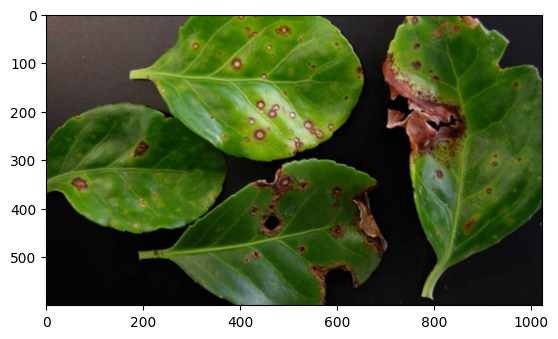

Predicted disease: Coffee miner


In [19]:
# Get the path to the uploaded image
uploaded_image_path = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded_image_path.keys())[0]

# Make prediction
pred_disease = disease_prediction(image_path)
print('Predicted disease:', pred_disease)